In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_excel('./data/Housing.xlsx')

In [3]:
data[['House Price', 'House Size (sq.ft.)']].head()

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270


## Simple (univariate) regression

Regression analysis assumes the existence of a linear relationship between the two variables.

In this case the prediction is made with the help of the best fitting line that contains the least amount of estimation errors:

$y = \alpha+ \beta x$, where $\alpha$ is an intercept, $\beta$ is a slope.

It quantifies the relationship between a variable, called <u>dependent variable</u>, and one or more <u>explanatory variables</u> (independent variables).

In the example "House size" is an explanatory var, "House price" - dependent variable.

In [4]:
# independent variable
X = data['House Size (sq.ft.)']
# dependent variable (predictor)
y = data['House Price']

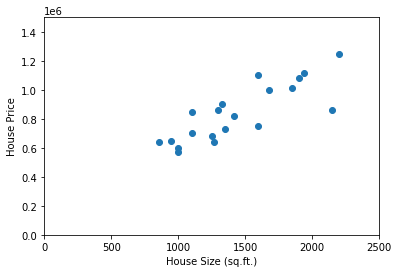

In [5]:
plt.scatter(X,y)
plt.axis([0, 2500, 0, 1500000])
plt.xlabel('House Size (sq.ft.)')
plt.ylabel('House Price')
plt.show()

The regression model can be written as:

$Y = \alpha+ \beta x + {error}$, where error is residuals. The best fitting line minimizes the sum of the squared residuals.


## Explanatory power of the regression model


<u>Coeficient of determination</u> (R-squared) - is a measurement used to explain how much variability of one factor can be caused by its relationship to another related factor:
$$
R^2 = 1 - \frac{SSR}{TSS},\quad R^2\in [0,1]
$$
where:
* <u>Total squred sum</u>:
$TSS = \sum(y_i - \overline{y})^2$, where $\overline{y}$ - mean value of the dependent variable 

* <u>Squared sum of residuals</u>: 
$SSR = \sum(\hat{y} - \overline{y})^2$, where $\hat{y}$ - predicted value (point on the regression line)

<br/>

The higher $R^2$ is, the more predictive power the model has. Model with R^2 > 30% - in most cases can be considered as the one having good explanatory power.

<br/>

$$TSS = SSE + SSR$$

<u>Sum of squares error</u>:
$SSE = \sum e_i^2$, where $e_i$ - the difference between the observed value and the predicted value.

SSE measures the unexplained variability by the regression.



## OLS (Ordinary least squares) estimates 

OLS technique allows to find $\alpha$ and $\beta$ coefficients for regression line with the least ${error}$ 

In [6]:
# By default, statsmodels fits a line passing through the origin, i.e. it doesn't fit an intercept.
# Hence, you need to use 'add_constant' so that it also fits an intercept.
#
X1 = sm.add_constant(X)
# X1.head()

In [7]:
# regression
#
reg = sm.OLS(y, X1).fit()

In [8]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           8.13e-06
Time:                        13:02:22   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`Dep. Variable` - name of the dependent variable

`Model`, `Method` - type of regression

`R-squared` - R-squared value 

`(coef, const)` - is an intercept $\alpha$

`(coef, dependent_var_name)` - is a slope $\beta$



In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [10]:
print("Slope: {}\nIntercept: {}\nR-value: {}\nP-value: {}\nStandard error: {}" \
      .format(slope, intercept, r_value, p_value, std_err))

Slope: 401.91628631922595
Intercept: 260806.2360560964
R-value: 0.8235775534696924
P-value: 8.129642377231308e-06
Standard error: 65.24299510636492


## Multivariate regressions

$y_i= \beta_0+ \sum\beta_i X_i + e_i$ 

By considering more variables in the regression equation, we’ll improve its explanatory power and provide a better idea of the full picture of circumstances that determine the development of the variable we are trying to predict.

Does explanatory variable improves a model's predictive power? We can remove variable and rebuild the regression, or we can compare the p-values of beta coefficients (the probability that the beta coefficients should be different).

Low p-value: there is a low chanse that the beta coefficient are different than estimated. A p-value that is lower than 5% (or 1%) allows us to state that we can be 95% confident that the beta coefficent we've estimated is different than 0.

If p-value is greater than 5% (or 1%) then beta coefficient is "not statistically significant"



In [11]:
data = pd.read_excel('./data/Housing.xlsx')

In [12]:
data.head()

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995


Independent variables: "House Size", "Number of Rooms", "Year of Construction"

In [13]:
X = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']]
y = data['House Price']

In [16]:
X1 = sm.add_constant(X)
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           6.82e-05
Time:                        13:13:43   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent variables: "House Size", "Number of Rooms"

In [19]:
X = data[['House Size (sq.ft.)', 'Number of Rooms']]
y = data['House Price']

In [20]:
X1 = sm.add_constant(X)
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           5.77e-05
Time:                        13:22:52   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent variables: "House Size", "Year of Construction"

In [21]:
X = data[['House Size (sq.ft.)', 'Year of Construction']]
y = data['House Price']

In [22]:
X1 = sm.add_constant(X)
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           1.26e-05
Time:                        13:26:02   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent variables: "Number of Rooms", "Year of Construction"

In [25]:
X = data[['Number of Rooms', 'Year of Construction']]
y = data['House Price']

In [26]:
X1 = sm.add_constant(X)
reg = sm.OLS(y, X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           6.79e-05
Time:                        13:29:19   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""